### Please run with Python 3.6 because of weird Numpy issue occurring when adding the LSTM layer!

In [1]:
# Disable TensorFlow logging
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Data loading

In [2]:
from utils import jsonfile
from utils import datautil
    
train_data = jsonfile.read('data/laroseda_train.json')['reviews']
test_data = jsonfile.read('data/laroseda_test.json')['reviews']

In [3]:
print(f'Reviews for train: {len(train_data)}')
print(f'Reviews for test : {len(test_data)}')

Reviews for train: 12000
Reviews for test : 3000


# Data exploration

In [4]:
print(train_data[0])

{'index': '11262', 'title': 'Foarte slab', 'content': 'ca aspect este foarte frumoasa dar cine vrea sa se joace cu tastatura nu poate', 'starRating': '1'}


In [5]:
ratings = [0 for i in range(5)] 
for entry in train_data:
    ratings[ord(entry['starRating']) - ord('1')] += 1

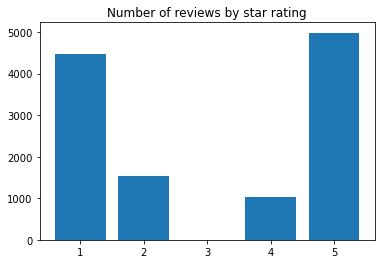

In [6]:
import matplotlib.pyplot as plt

x = ['1', '2', '3', '4', '5']
plt.title('Number of reviews by star rating')
plt.bar(x, ratings)
plt.show()

# Cleanup

In [7]:
x_train, y_train = datautil.clean(train_data)
x_test, y_test = datautil.clean(test_data)

We'll assign the '0' label for negative reviews (with 1- or 2-star ratings) and '1' for the positive reviews (with 4- or 5-star ratings).

We'll merge the title and the content to a common 'text' field which is cleaned.

# Post-cleanup

In [8]:
print(x_train[0])
print(y_train[0])

foarte slab ca aspect este foarte frumoasa dar cine vrea sa se joace cu tastatura nu poate
0


# Tokenizer setup

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_WORDS = 10000
MAX_LEN = 32

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(x_train)

# Embedding layer with LSTM approach - dimension: 256

In [10]:
from approach import lstm_embedding

config = lstm_embedding.Config(256, MAX_WORDS, MAX_LEN)
model, history = lstm_embedding.train(config, tokenizer, x_train, y_train)

Found 21090 unique tokens.
Shape of x: (12000, 32)
Shape of y: (12000,)


Preparing to train the following model:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 256)           2560000   
_________________________________________________________________
dropout (Dropout)            (None, 32, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32, 256)           525312    
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 3,610,881
Trainable params: 3,610,881
Non-trainable params: 0
_______________________________________________________________

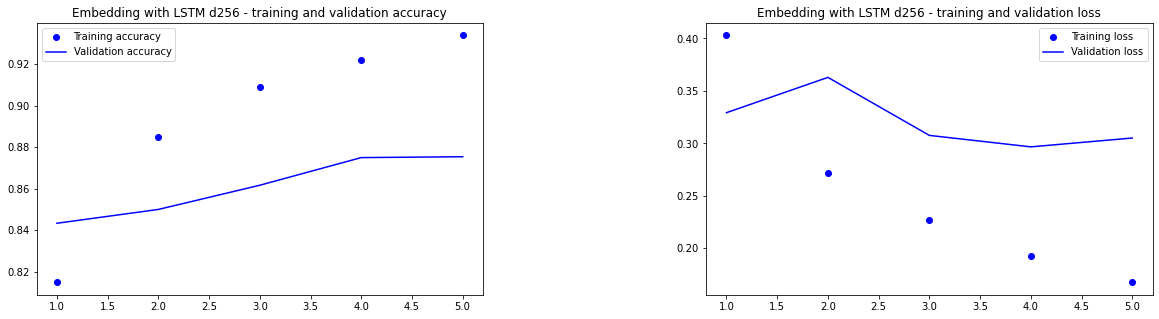

In [11]:
from approach import plotting
plotting.plot(history, 'Embedding with LSTM d256')

In [12]:
loss, acc = lstm_embedding.evaluate_model(model, config, tokenizer, x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {acc * 100:.2f}%')

94/94 [==============================] - 1s 13ms/step - loss: 0.2873 - acc: 0.8800
Loss: 0.2873203158378601
Accuracy: 88.00%


In [13]:
lstm_embedding.predict_sample(model, config, tokenizer, x_test, y_test, 100)

Sample #100:
Input: foarte slab foarte dezamagit bateria nu tine deloc si mai ales ca produsul chiar daca era impachetat ok are si o mica zgarietura pe partea lucioasa
Expected output: 0
Prediction: [0.03270552]


# Simple Embedding layer approach - dimension: 128

In [14]:
from approach import simple_embedding

config = simple_embedding.Config(128, MAX_WORDS, MAX_LEN)
model, history = simple_embedding.train(config, tokenizer, x_train, y_train)

Found 21090 unique tokens.
Shape of x: (12000, 32)
Shape of y: (12000,)


Preparing to train the following model:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 128)           1280000   
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                131104    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,411,137
Trainable params: 1,411,137
Non-trainable params: 0
_________________________________________________________________
None


Training the model...

Epoch 1/5
300/300 [==============================] - 1s 5ms/step - loss: 0.4102 - acc: 0.7960 - v

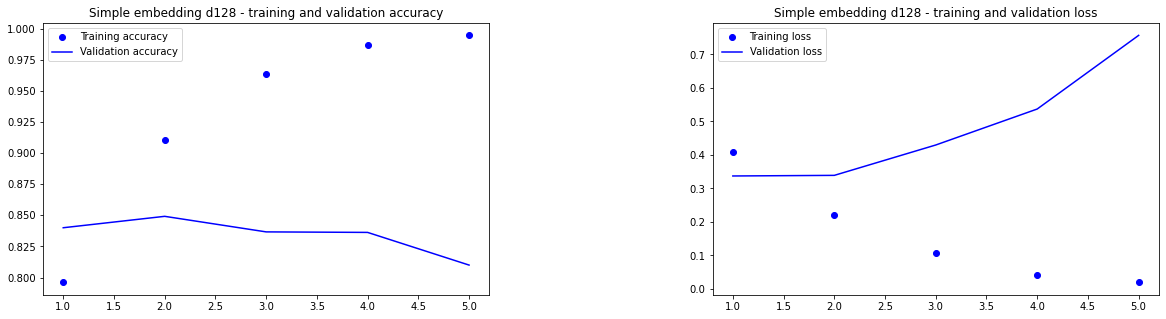

In [15]:
from approach import plotting
plotting.plot(history, 'Simple embedding d128')

### Evaluating approach

In [16]:
loss, acc = simple_embedding.evaluate_model(model, config, tokenizer, x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {acc * 100:.2f}%')

94/94 [==============================] - 0s 1ms/step - loss: 0.7535 - acc: 0.8160
Loss: 0.7534985542297363
Accuracy: 81.60%


In [17]:
simple_embedding.predict_sample(model, config, tokenizer, x_test, y_test, 100)

Sample #100:
Input: foarte slab foarte dezamagit bateria nu tine deloc si mai ales ca produsul chiar daca era impachetat ok are si o mica zgarietura pe partea lucioasa
Expected output: 0
Prediction: [0.1333769]


# Simple Embedding layer approach - dimension: 256

In [18]:
from approach import simple_embedding

config = simple_embedding.Config(256, MAX_WORDS, MAX_LEN)
model, history = simple_embedding.train(config, tokenizer, x_train, y_train)

Found 21090 unique tokens.
Shape of x: (12000, 32)
Shape of y: (12000,)


Preparing to train the following model:

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 256)           2560000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                262176    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,822,209
Trainable params: 2,822,209
Non-trainable params: 0
_________________________________________________________________
None


Training the model...

Epoch 1/5
300/300 [==============================] - 2s 8ms/step - loss: 0.3898 - acc: 0.8115 - v

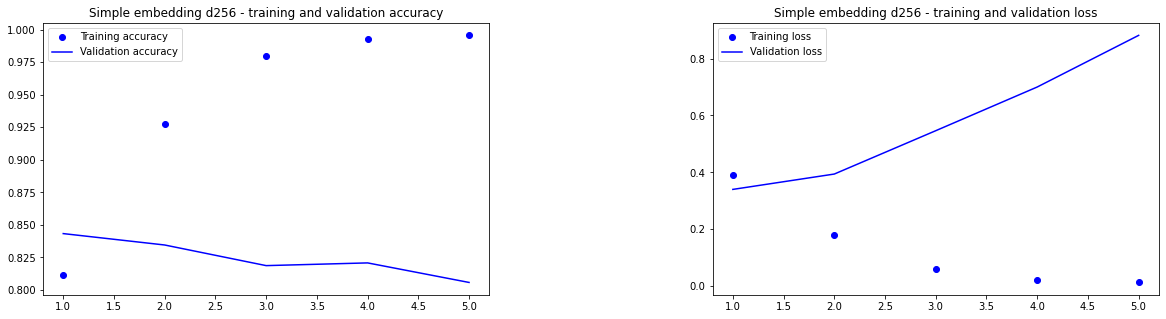

In [19]:
from approach import plotting
plotting.plot(history, 'Simple embedding d256')

### Evaluating the approach

In [20]:
loss, acc = simple_embedding.evaluate_model(model, config, tokenizer, x_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {acc * 100:.2f}%')

94/94 [==============================] - 0s 2ms/step - loss: 0.8346 - acc: 0.8177
Loss: 0.8345584273338318
Accuracy: 81.77%


In [21]:
simple_embedding.predict_sample(model, config, tokenizer, x_test, y_test, 100)

Sample #100:
Input: foarte slab foarte dezamagit bateria nu tine deloc si mai ales ca produsul chiar daca era impachetat ok are si o mica zgarietura pe partea lucioasa
Expected output: 0
Prediction: [0.0327715]
